# Lab 02: Markov Decision Process

Reference:

- Pytorch 1.x Reinforcement Learning Cookbook (Packtpub)
- Hands-On Reinforcement Learning for Games (Packtpub)
- https://www.kdnuggets.com/2018/03/5-things-reinforcement-learning.html
- Reinforcement Learning: An Introduction (Sutton et al.)
- https://github.com/werner-duvaud/muzero-general (simulator code)

## What is Markov decision process?
Markov decision process (MDP) is a discrete-time stochastic control process.
It provides a mathematical framework for modeling decision making in situations where outcomes are partly random and partly under the control of a decision maker.
MDPs are useful for studying optimization problems solved via dynamic programming.
They are used in many disciplines, including robotics, automatic control, economics and manufacturing.

The MDP model is based on the idea of an environment that evolves as a Markov chain.

### Markov chain

A Markov chain is a model of the dynamics of a discrete time system that obeys the (first order) **Markov property**, meaning that *the state $s^{t+1}$ at time $t+1$ is conditionally given the state at time $t$, but it is independent of the state at times $0, \ldots, t-1$*, i.e.,

$$ p(s^{t+1} \mid s^t, s^{t-1}, \ldots, s^0) = p(s^{t+1} \mid s^t). $$

We might say that **the current state is all you need to know to predict the next state**.

A Markov chain is defined by a set of possible states $S={s_0, s_1, \ldots, s_n}$ and a transition matrix $T(s,s')$ containing the propbabilities of state $s$ (current state) transitioning to state $s'$ (next state).

Here is a visualization of a simple Markov chain:

<img src="img/RL_markov.png" title="Markov chain" style="width: 600px;" />

You might be interested in [this Markov chain simulator](https://setosa.io/ev/markov-chains/) and the [full screen diagram](https://setosa.io/markov/index.html).

### Creating a Markov chain

Assume we have **Three states** (**A**, **B**, **C**), the Markov chain is:

<img src="img/MarkovChain.PNG" title="Markov chain example" style="width: 400px;" />

The transition matrix is:

$$
T =
\begin{bmatrix}
0.3 & 0.5 & 0.2 \\ 
0.8 & 0.1 & 0.1 \\
0.1 & 0.3 & 0.6
\end{bmatrix}
$$

Each row means current state, and each column means the next state to go. If you consider $0.5$ in the matrix (row 0, and column 1), you can say that "now you are in state **A** and the possible to go to next state of **B** is 0.5"

In [24]:
# import pytorch
import torch

T = torch.tensor([[0.3, 0.5, 0.2],
                  [0.8, 0.1, 0.1],
                  [0.1, 0.3, 0.6]])

# show the matrix
print(T)

tensor([[0.3000, 0.5000, 0.2000],
        [0.8000, 0.1000, 0.1000],
        [0.1000, 0.3000, 0.6000]])


#### Probability after k steps

The probability after $k$ steps equation is:
$$ T_n = T^n $$

Thus, if we want to find the T state at step 2, 5, 10, 20, we can do as:

In [25]:
T_2 = torch.matrix_power(T,2)
print('state transition at k=2:', T_2)
T_5 = torch.matrix_power(T,5)
print('state transition at k=5:', T_5)
T_10 = torch.matrix_power(T,10)
print('state transition at k=10:', T_10)
T_20 = torch.matrix_power(T,20)
print('state transition at k=20:', T_20)

state transition at k=2: tensor([[0.5100, 0.2600, 0.2300],
        [0.3300, 0.4400, 0.2300],
        [0.3300, 0.2600, 0.4100]])
state transition at k=5: tensor([[0.3991, 0.3230, 0.2779],
        [0.4153, 0.3100, 0.2746],
        [0.3926, 0.3165, 0.2908]])
state transition at k=10: tensor([[0.4026, 0.3170, 0.2804],
        [0.4024, 0.3172, 0.2804],
        [0.4024, 0.3170, 0.2806]])
state transition at k=20: tensor([[0.4024, 0.3171, 0.2805],
        [0.4024, 0.3171, 0.2805],
        [0.4024, 0.3171, 0.2805]])


The state transition after step 10 to 20 steps are going to converges. This means that, no matter what state the process is in, it has the same probability of transitioning to A (40.24%), B (31.71%), and C (28.05%).

Assume we have the initial distribution of three state is:

$$
V=
\begin{bmatrix}
0.2 & 0.5 & 0.3
\end{bmatrix}
$$

The initial distribution means you can go to any states at the first time, but it depends on the probability. In this matrix, we can say that there are possible to go to state A more than other states.

In [26]:
V_0 = torch.tensor([[0.2, 0.5, 0.3]])

print(V_0)

tensor([[0.2000, 0.5000, 0.3000]])


Try to calculate the state distribution after state 1, 2, 5, 10, and 20

In [27]:
V_1 = torch.mm(V_0, T)
print("Distribution of states after 1 step:\n{}\n".format(V_1))
V_2 = torch.mm(V_0, T_2)
print("Distribution of states after 2 step:\n{}\n".format(V_2))
V_5 = torch.mm(V_0, T_5)
print("Distribution of states after 5 step:\n{}\n".format(V_5))
V_10 = torch.mm(V_0, T_10)
print("Distribution of states after 10 step:\n{}\n".format(V_10))
V_20 = torch.mm(V_0, T_20)
print("Distribution of states after 20 step:\n{}\n".format(V_20))

Distribution of states after 1 step:
tensor([[0.4900, 0.2400, 0.2700]])

Distribution of states after 2 step:
tensor([[0.3660, 0.3500, 0.2840]])

Distribution of states after 5 step:
tensor([[0.4053, 0.3146, 0.2801]])

Distribution of states after 10 step:
tensor([[0.4024, 0.3171, 0.2805]])

Distribution of states after 20 step:
tensor([[0.4024, 0.3171, 0.2805]])



We can see that, after 10 steps, the state distribution converges. The probability of being in A (40.24%), B (31.71%) and the probability of being in s1 (28.05%) remain unchanged in the long run.

Starting with $[0.2,0.5,0.3]$, the state distribution after one iteration becomes $[0.4024, 0.3171, 0.2805]$. Details of its calculation are illustrated in the following diagram:

<img src="img/MarkovDistributionChart.png" title="Markov chain example" style="width: 600px;" />

### Come back to MDP

MDP is slightly different from a simple Markov chain because MDP has to consider agent's actions which affect to the system's dynamics.
Thus, not only probability of transition of nextstate, but also agent's action need to be calculate. We assign $A$ as all possible actions and $a$ as the action which agent selects (at this situation, $a$ must be in $A$ or $a \in A$.

The transition probabilities become a **3D tensor** of size $|S|\times |A|\times |S|$
mapping each state/action pair to a probability distribution over the states.

### A simple MDP

Suppose we have **three states (s0, s1, s2) and two actions (a0, a1)** and that the state/action transition tensor is as follows:

$$T=
\begin{cases}
 &
\begin{bmatrix}
0.8 & 0.1 & 0.1 \\ 
0.1 & 0.6 & 0.3
\end{bmatrix} \\ 
 & 
\begin{bmatrix}
0.7 & 0.2 & 0.1 \\ 
0.1 & 0.8 & 0.1
\end{bmatrix} \\  
 & 
\begin{bmatrix}
0.6 & 0.2 & 0.2 \\ 
0.1 & 0.4 & 0.5
\end{bmatrix}
\end{cases}
$$

The first matrix block is mean current state $s0$, second block is $s1$, and the third block is $s2$.

Consider into the matrix block, the rows of matrix block mean actions (a0 is 1st row, and a1 is 2nd row). And the columns of matix block is the same as Markov Chain: next state $s'$

In [28]:
# State transition function
T = torch.tensor([[[0.8, 0.1, 0.1],
                   [0.1, 0.6, 0.3]],
                  [[0.7, 0.2, 0.1],
                   [0.1, 0.8, 0.1]],
                  [[0.6, 0.2, 0.2],
                   [0.1, 0.4, 0.5]]])

# show the matrix
print(T)

tensor([[[0.8000, 0.1000, 0.1000],
         [0.1000, 0.6000, 0.3000]],

        [[0.7000, 0.2000, 0.1000],
         [0.1000, 0.8000, 0.1000]],

        [[0.6000, 0.2000, 0.2000],
         [0.1000, 0.4000, 0.5000]]])


Assume we want to observe at state 2, and see the probability to change to state 1 with playing action 0, we can write in code with

In [29]:
T[2,0,1]

tensor(0.2000)

To complete our simple MDP, we need a *reward function* $R$ and a *discount factor* $\gamma$.

**reward function $R$** is a set of rewards that depend on the state and the action taken.

**discount factor $\gamma$** is how important future rewards are to the current state. Discount factor is a value between 0 and 1. A reward $R$ that occurs $n$ steps in the future from the current state, is multiplied by $\gamma^n$ to describe its importance to the current state (Thus, current reward is $\gamma^tR$, where $t$ is a number step.

Suppose $R = [ -1, 0.1, 0.9 ]$ and $\gamma = 0.5$. Let's define our MDP in Python with PyTorch tensors:

In [30]:
# Reward function
R = torch.tensor([-1.,0.1,0.9])

# Discount factor
gamma = 0.5

### The agent's goal

Once the MDP is defined, the agent's goal is to **maximize its expected reward**.

If we start in state $s^0$ and perform a series of actions $a^0, a^1, \ldots a^{T-1}$ placing us in state $s^1, s^2, \ldots s^T$, we obtain the total reward $R_F$

$$R_F=\sum_{t=0}^T \gamma^{t} R(s^t)$$

The agent's goal is to behave so as to maximize the expected total reward. To do so,
it should come up with a policy $\pi : S \times A \rightarrow \mathbb{R}$ giving a probability distribution
over actions that can be executed in each state, then when in state $s$, sample action $a$ according to that
distribution $\pi(s,\cdot)$, and repeat.

Now the agent's goal can be clearly specified as finding an optimal policy

$$ \pi^* = \textrm{argmax}_\pi \mathbb{E}_{a^t \sim \pi(s^t), s^{t} \sim T(s^{t-1},a^{t-1})}\left[ \sum_{t=0}^T \gamma^{t} R(s^t) \right]$$

Under a particular policy $\pi$, then, the *value* of state $s$ is the expected reward we obtain by following $\pi$ from state $s$:

$$ V^\pi(s) = \mathbb{E}_{a^t \sim \pi(s^t), s^{t} \sim T(s^{t-1},a^{t-1}) \mid s^0=s}\left[ R(s) + \sum_{t=1}^T \gamma^{t} R(s^t) \right]$$

The value function clearly obeys the *Bellman equations*

$$ V^\pi(s) = R(s) + \gamma \sum_{s',a'} \pi(s,a') T(s,a',s') V^\pi(s'). $$ 

#### Too difficult?

OK, lets see the easier version of equation

The equation of V relate at time t is:

$$V_{t+1}=R+\gamma * T * V_t$$

When the value converges, which mean $V_{t+1}=V_t$, so we can derive the value $V$ as:

$$
V=R+\gamma * T * V \\
V = (I-\gamma * T)^{-1} * R.
$$

The function can be writed as:

In [32]:
def cal_value_matrix_inversion(gamma, trans_matrix, rewards):
    inv = torch.inverse(torch.eye(rewards.shape[0]) - gamma * trans_matrix)
    V = torch.mm(inv, rewards.reshape(-1, 1))
    return V

Asume that we select action $a_0$ in all curcumstances.

In [31]:
action = 0

Find transition matrix:

In [34]:
trans_matrix = T[:, action]

print(trans_matrix)

tensor([[0.8000, 0.1000, 0.1000],
        [0.7000, 0.2000, 0.1000],
        [0.6000, 0.2000, 0.2000]])


Calculate value from the bellman equation above:

In [35]:
V = cal_value_matrix_inversion(gamma, trans_matrix, R)

print("The value function under the optimal policy is:\n{}".format(V))

The value function under the optimal policy is:
tensor([[-1.6781],
        [-0.5202],
        [ 0.3828]])


### Lab exercise 1

1. Try to use different $\gamma$ values from 0 to 1 for 5 values. 0 means we only care about the immediate reward, and 1 means we do not care the reward
2. Try to find the value $V$ in step $k=1,2,3,..,10$ with the action $a_0$ and random action. Show the output.

In [ ]:
# Your code here

### Policy evaluation

To determine how good a particular policy is, we use policy evaluation.
Policy evaluation is an iterative algorithm. It starts with arbitrary values for each state
and then iteratively updates the values based on the Bellman equations until the values converge. Assume $\pi$ is the value of a policy, the update equation is:

$$ V(s) = \sum_a \pi(s,a) \left[ R(s,a) + \gamma \sum_{s'} T(s,a',s') V(s') \right] $$ 

$\pi(s,a)$: the probability of taking action $a$ in stat $s$ under policy $\pi$
$R(s,a)$: the reward received in state $s$ by taking action $a$

You can see this algorithm's pseudocode in Sutton's book on page 75.

Because Policy evaluation is a loop processing, you need to stop by conditions. There are 2 ways to terminate the iterative updating process.
- Fix number of iterations
- Set some specific threshold and terminating the process when the values of all states change to lower than the threshold.

Here we compute the value of the three states in our MDP assuming the agent always peforms the first action. The function process are:

1. Initializes the policy values as all zeros.
2. Updates the values based on the Bellman expectation equation.
3. Computes the maximal change of the values across all states.
4. If the maximal change is greater than the threshold, it keeps updating the values. Otherwise, it terminates the evaluation process and returns the latest values.

In [40]:
def policy_evaluation(policy, trans_matrix, rewards, gamma, threshold):
    """
    Perform policy evaluation
    @param policy: policy matrix containing actions and their 
                            probability in each state
    @param trans_matrix: transformation matrix
    @param rewards: rewards for each state
    @param gamma: discount factor
    @param threshold: the evaluation will stop once values 
                           for all states are less than the threshold
    @return: values of the given policy for all possible states
    """
    n_state = policy.shape[0]
    V = torch.zeros(n_state)
    V_his = [V]
    i = 0
    while True:
        V_temp = torch.zeros(n_state)
        i += 1
        for state, actions in enumerate(policy):
            for action, action_prob in enumerate(actions):
                V_temp[state] += action_prob * (R[state] + gamma * torch.dot(trans_matrix[state, action], V))
        max_delta = torch.max(torch.abs(V - V_temp))
        V = V_temp.clone()
        V_his.append(V)
        if max_delta <= threshold:
            break
    return V, V_his

Define the threshold used to determine when to stop the evaluation process and the optimal policy where action a0 is chosen under all circumstances:

In [41]:
threshold = 0.0001

policy_optimal = torch.tensor([[1.0, 0.0],
                               [1.0, 0.0],
                               [1.0, 0.0]])

Using the policy_evaluation function to find the optimal policy:

In [45]:
V, V_his = policy_evaluation(policy_optimal, T, R, gamma, threshold)

print("The value function under the optimal policy is:\n{}".format(V))

The value function under the optimal policy is:
tensor([-1.6780, -0.5201,  0.3829])


Plot the resulting history of values:

In [58]:
import matplotlib.pyplot as plt

def plot_history(V_history, gamma):
    s = []
    text = []
    for i in range(len(V_history[0])):
        s_x, = plt.plot([v[i] for v in V_history])
        s.append(s_x)
        text.append('State s' + str(i))

    plt.title('Optimal policy with gamma = {}'.format(str(gamma)))
    plt.xlabel('Iteration')
    plt.ylabel('Policy values')
    plt.legend(s, text, loc="upper left")
    
    plt.show()

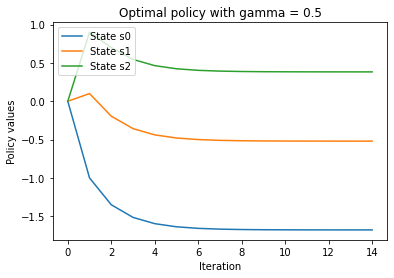

In [59]:
plot_history(V_his, gamma)

### Lab exercise 2

1. Change discount factor to 0.1, 0.2, and 0.99 and plot the results.

In [60]:
# Your code here

### Value iteration algorithm

The idea behind value iteration is quite similar to that of policy evaluation. It is also an iterative algorithm. It starts with arbitrary policy values and then iteratively updates the values based on the Bellman optimality equation until they converge. So in each iteration, instead of taking the expectation (average) of values across all actions, it picks the action that achieves the maximal policy values:

$$ V^*(s) = \max_a \left[ R(s,a) + \gamma \sum_{s'} T(s,a',s') V^*(s') \right] $$ 

$V^*(s)$ denotes the optimal value, which is the value of the optimal policy

Once the optimal values are computed, we obtain the optimal policy:

$$ \pi^*(s) = \text{argmax}_a \sum_{s'}T(s,a,s') \left[ R(s,a) + \gamma V^*(s') \right] $$ 

### Apply it to gym environment

In this step, we try to use *FrozenLake* environment to see how to implement the value iteration.

FrozenLake is a typical Gym environment with a discrete state space. It is about moving an agent from the starting location to the goal location in a grid world, and at the same time avoiding traps. Currently, We use four by four grid (https://gym.openai.com/envs/FrozenLake-v0/).

Import gym library and pytorch library.

In [2]:
import gym
import torch

Create Frozen environment and take a look states and actions

In [16]:
env = gym.make("FrozenLake-v1")

n_state = env.observation_space.n
print("number of states:", n_state)

n_action = env.action_space.n
print("number of actions:", n_action)

number of states: 16
number of actions: 4


Reset and render the environment. Because the graphical of the environment is **text** style and no image pop-up. We can use render() directly.

In [46]:
state = env.reset()
env.render()

print("state: ", state)


SFFF
FHFH
FFFH
HFFG
state:  0


Try to put an down action to make the agent work.

In [47]:
left = 0
down = 1
right = 2
up = 3
new_state, reward, is_done, info = env.step(down)
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG


Check the output of environment class after take action. In the <code>info</code>, and <code>new_state</code>, it says that the agent lands in <code>new_state</code>, with probability 0.3333333333333333. The reward is 0 because the agent has not reached the goal and the episode is not done. You might see the agent landing in different state, or staying in state 0 because of the slippery surface.

In [50]:
print("state: ", new_state)

print("reward: ", reward)

print("Finish?: ", is_done)

print("information: ", info)

state:  1
reward:  0.0
Finish?:  False
information:  {'prob': 0.3333333333333333}


Define a function that simulates a FrozenLake episode given a policy and returns the total reward

In [63]:
def run_episode(env, policy, render=False):
    state = env.reset()
    if render:
        env.render()
    total_reward = 0
    is_done = False
    step = 1
    while not is_done:
        action = policy[state].item()
        state, reward, is_done, info = env.step(action)
        if render:
            print('step: ', step)
            env.render()
        total_reward += reward
        step += 1
        if is_done:
            break
    return total_reward

Try to run 500 episodes with random policy, and see the results

We randomly generated a policy that was composed of 16 actions for the 16 states. Keep in mind that in FrozenLake, the movement direction is only partially dependent on the chosen action. This increases the uncertainty of control.

In [64]:
n_episode = 500
total_rewards = []

for episode in range(n_episode):
    # Create random policy with integer value deal to number of actions with n_state size.
    random_policy = torch.randint(high=n_action, size=(n_state,))
    # run an episode
    total_reward = run_episode(env, random_policy)
    total_rewards.append(total_reward)
    
    if total_reward == 1:
        best_policy = random_policy
        break
    
print('Average total reward under random policy: {}'.format(sum(total_rewards) / n_episode))
# see the best policy
print(best_policy)

Average total reward under random policy: 0.002
tensor([1, 1, 0, 3, 1, 0, 1, 0, 3, 0, 2, 2, 1, 2, 1, 3])


Try to run 500 episodes again using the <code>best_policy</code>, to check that the winning rate is good or not.

In [66]:
total_rewards = []

for episode in range(n_episode):# run an episode
    total_reward = run_episode(env, best_policy)
    total_rewards.append(total_reward)
    
print('Average total reward under best policy: {}'.format(sum(total_rewards) / n_episode))

Average total reward under best policy: 0.046


See the simulator

In [69]:
total_reward = run_episode(env, best_policy, True)

print('Total reward under best policy: {}'.format(total_reward))


SFFF
FHFH
FFFH
HFFG
step:  1
  (Down)
SFFF
FHFH
FFFH
HFFG
step:  2
  (Down)
SFFF
FHFH
FFFH
HFFG
step:  3
  (Down)
SFFF
FHFH
FFFH
HFFG
step:  4
  (Left)
SFFF
FHFH
FFFH
HFFG
step:  5
  (Down)
SFFF
FHFH
FFFH
HFFG
step:  6
  (Left)
SFFF
FHFH
FFFH
HFFG
step:  7
  (Left)
SFFF
FHFH
FFFH
HFFG
step:  8
  (Left)
SFFF
FHFH
FFFH
HFFG
step:  9
  (Down)
SFFF
FHFH
FFFH
HFFG
step:  10
  (Left)
SFFF
FHFH
FFFH
HFFG
step:  11
  (Left)
SFFF
FHFH
FFFH
HFFG
step:  12
  (Left)
SFFF
FHFH
FFFH
HFFG
step:  13
  (Down)
SFFF
FHFH
FFFH
HFFG
Total reward under best policy: 0.0


### Solving FrozenLake with value iteration

At above, we found that the best policy from random policy is not good enough, so let's implement value iteration.

Set discount factor $\gamma$ as 0.9 and convergence threshold 0.000001

In [70]:
gamma = 0.9
threshold = 0.000001

Create value iteration function

In [71]:
def value_iteration(env, gamma, threshold):
    """
    Solve a given environment with value iteration algorithm
    @param env: OpenAI Gym environment
    @param gamma: discount factor
    @param threshold: the evaluation will stop once values for 
                       all states are less than the threshold
    @return: values of the optimal policy for the given 
              environment
    """
    n_state = env.observation_space.n
    n_action = env.action_space.n
    V = torch.zeros(n_state)
    while True:
        V_temp = torch.empty(n_state)
        for state in range(n_state):
            v_actions = torch.zeros(n_action)
            for action in range(n_action):
                # calculate the optimal policy using probability in environment
                for trans_prob, new_state, reward, _ in env.env.P[state][action]:
                    v_actions[action] += trans_prob * (reward + gamma * V[new_state])
            V_temp[state] = torch.max(v_actions)
        max_delta = torch.max(torch.abs(V - V_temp))
        V = V_temp.clone()
        if max_delta <= threshold:
            break
    return V

Find the optimal value using value iteration function

In [72]:
V_optimal = value_iteration(env, gamma, threshold)

print('Optimal values:\n{}'.format(V_optimal))

Optimal values:
tensor([0.0689, 0.0614, 0.0744, 0.0558, 0.0918, 0.0000, 0.1122, 0.0000, 0.1454,
        0.2475, 0.2996, 0.0000, 0.0000, 0.3799, 0.6390, 0.0000])


Create a function to extract from optimal value to be optimal policy.

In [73]:
def extract_optimal_policy(env, V_optimal, gamma):
    """
    Obtain the optimal policy based on the optimal values
    @param env: OpenAI Gym environment
    @param V_optimal: optimal values
    @param gamma: discount factor
    @return: optimal policy
    """
    n_state = env.observation_space.n
    n_action = env.action_space.n
    optimal_policy = torch.zeros(n_state)
    for state in range(n_state):
        v_actions = torch.zeros(n_action)
        for action in range(n_action):
            for trans_prob, new_state, reward, _ in env.env.P[state][action]:
                v_actions[action] += trans_prob * (reward 
                           + gamma * V_optimal[new_state])
        optimal_policy[state] = torch.argmax(v_actions)
    return optimal_policy

In [74]:
optimal_policy = extract_optimal_policy(env, V_optimal, gamma)

print('Optimal policy:\n{}'.format(optimal_policy))

Optimal policy:
tensor([0., 3., 0., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])


Try to run 500 episodes again using the <code>optimal_policy</code>, to check that the winning rate is good or not.

In [77]:
total_rewards = []

for episode in range(n_episode):# run an episode
    total_reward = run_episode(env, optimal_policy)
    total_rewards.append(total_reward)
    
print('Average total reward under optimal policy: {}'.format(sum(total_rewards) / n_episode))

Average total reward under optimal policy: 0.728


You can see that the optimal_policy accuracy is better than the random_policy.

### Lab exercise 3

1. Change discount factor to at least 20 different data and plot the average reward (y-axis) via the discount factor (x-axis).

### Implement with policy iteration

A policy iteration algorithm can be subdivided into two components: policy evaluation and policy improvement. It starts with an arbitrary policy. And in each iteration, it first computes the policy values given the latest policy, based on the Bellman expectation equation; it then extracts an improved policy out of the resulting policy values, based on the Bellman optimality equation. It iteratively evaluates the policy and generates an improved version until the policy doesn't change any more.

$$ V(s) = \sum_{s'} T(s,a',s') \left[ R(s,a,s') + \gamma V(s') \right] $$ 

Once the optimal values are computed, we obtain the optimal policy:

$$ \pi(s) = \text{argmax}_a \sum_{s'}T(s,a,s') \left[ R(s,a,s') + \gamma V(s') \right] $$ 

Modify a policy_evaluation function to support in gym library.

In [78]:
def policy_evaluation(env, policy, gamma, threshold):
    """
    Perform policy evaluation
    @param env: OpenAI Gym environment
    @param policy: policy matrix containing actions and 
                            their probability in each state
    @param gamma: discount factor
    @param threshold: the evaluation will stop once values for all states are less than the threshold
    @return: values of the given policy
    """
    n_state = policy.shape[0]
    V = torch.zeros(n_state)
    while True:
        V_temp = torch.zeros(n_state)
        for state in range(n_state):
            action = policy[state].item()
            for trans_prob, new_state, reward, _ in env.env.P[state][action]:
                V_temp[state] += trans_prob * (reward + gamma * V[new_state])
        max_delta = torch.max(torch.abs(V - V_temp))
        V = V_temp.clone()
        if max_delta <= threshold:
           break
    return V

Create a policy_improvement function:

In [79]:
def policy_improvement(env, V, gamma):
    """
    Obtain an improved policy based on the values
    @param env: OpenAI Gym environment
    @param V: policy values
    @param gamma: discount factor
    @return: the policy
    """
    n_state = env.observation_space.n
    n_action = env.action_space.n
    policy = torch.zeros(n_state)
    for state in range(n_state):
        v_actions = torch.zeros(n_action)
        for action in range(n_action):
            for trans_prob, new_state, reward, _ in env.env.P[state][action]:
                v_actions[action] += trans_prob * (reward + gamma * V[new_state])
        policy[state] = torch.argmax(v_actions)
    return policy

Create policy_iteration function. The function combines policy_evaluation and policy_improvement.

In [80]:
def policy_iteration(env, gamma, threshold):
    """
    Solve a given environment with policy iteration algorithm
    @param env: OpenAI Gym environment
    @param gamma: discount factor
    @param threshold: the evaluation will stop once values 
                    for all states are less than the threshold
    @return: optimal values and the optimal policy for the given 
              environment
    """
    n_state = env.observation_space.n
    n_action = env.action_space.n
    policy = torch.randint(high=n_action, size=(n_state,)).float()
    while True:
        V = policy_evaluation(env, policy, gamma, threshold)
        policy_improved = policy_improvement(env, V, gamma)
        if torch.equal(policy_improved, policy):
            return V, policy_improved
        policy = policy_improved

Try it

In [84]:
V_optimal, optimal_policy = policy_iteration(env, gamma, threshold)

print('Optimal values:\n{}'.format(V_optimal))
print('Optimal policy:\n{}'.format(optimal_policy))

Optimal values:
tensor([0.0689, 0.0614, 0.0744, 0.0558, 0.0918, 0.0000, 0.1122, 0.0000, 0.1454,
        0.2475, 0.2996, 0.0000, 0.0000, 0.3799, 0.6390, 0.0000])
Optimal policy:
tensor([0., 3., 0., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])


Try to run 500 episodes again using the <code>optimal_policy</code>, to check that the winning rate is good or not.

In [85]:
total_rewards = []

for episode in range(n_episode):# run an episode
    total_reward = run_episode(env, optimal_policy)
    total_rewards.append(total_reward)
    
print('Average total reward under optimal policy: {}'.format(sum(total_rewards) / n_episode))

Average total reward under optimal policy: 0.746


### Lab exercise 4

1. Change discount factor to at least 20 different data and plot the average reward (y-axis) via the discount factor (x-axis).
2. See the policy evaluation, value iteration, and policy iteration, which one is better in
 - Fast convergence
 - Best accuracy